In [ ]:
from google.colab import files

import platform, sys
python_version=platform.python_version()
from distutils.version import LooseVersion, StrictVersion

if ( LooseVersion(python_version) < LooseVersion("3.0.0")):
    print("Python3 is needed!");
    print("How to fix: Runtime/Change_runtime_type/Python 3");
    sys.exit()
    
try:
    from dolfin import *; from mshr import *
except ImportError as e:
    !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
    !add-apt-repository -y ppa:fenics-packages/fenics
    !apt-get update -qq
    !apt install -y --no-install-recommends fenics
    from dolfin import *; from mshr import *
    
import matplotlib.pyplot as plt;
from IPython.display import clear_output, display; import time; import dolfin.common.plotting as fenicsplot 
import time

import os, sys, shutil

dolfin_version = dolfin.__version__
print ('dolfin version:', dolfin_version)

!rm -rf * # clean up all files
# Useful commands
# Remove an empty folder      : os.rmdir("my_results")
# Remove a folder with files  : shutil.rmtree("results")
# Make a folder               : os.mkdir("my_results")
# Runtime/Change_runtime_type/Python3

E: Package 'python-software-properties' has no installation candidate
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/fenics-packages/fenics/ubuntu bionic InRelease [15.4 kB]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:13 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease 

In [ ]:
from fenics import*

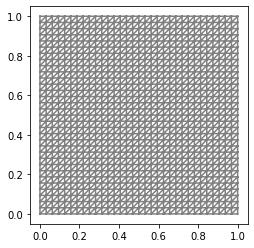

In [ ]:
mesh1=UnitSquareMesh(8,8)
mesh2=UnitSquareMesh(16,16)
mesh3=UnitSquareMesh(32,32)
plot(mesh3)


In [ ]:
V=FunctionSpace(mesh1,'P',2) #2-quadratic elements

In [ ]:
# Define boundary condition
# homework: u_true=sin(2*pi*(x-y)) (find u_D and f, solve this and plot it) (Solved)
# Compute error in L2 norm (solved)

u_D = Expression('sin(2*pi*(x[0]-x[1]))', degree=2)
def boundary(x, on_boundary): 
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

In [ ]:
# Define variational problem
u = TrialFunction(V)

v = TestFunction(V)

f = Expression('2*pow(2*pi,2)*sin(2*pi*(x[0]-x[1]))',degree=2)
a = dot(grad(u), grad(v))*dx

L = f*v*dx


0:00:00.005829


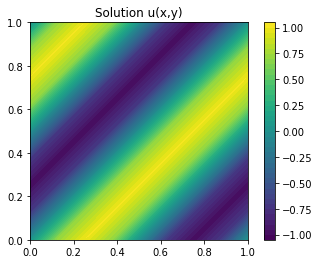

In [ ]:
from datetime import datetime


# Compute solution
u = Function(V)

startTime = datetime.now()
solve(a == L, u, bc)

endTime = datetime.now()

# Plot solution and mesh
p=plot(u, title="Solution u(x,y)")

plt.colorbar(p)

#plot(mesh)
print(endTime-startTime)

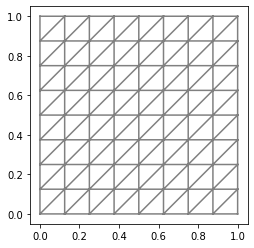

In [ ]:
u_true=u_D
plot(mesh1)
error_L2 = errornorm(u_true, u, 'L2')

# Compute maximum error at vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh1)
vertex_values_u = u.compute_vertex_values(mesh1)

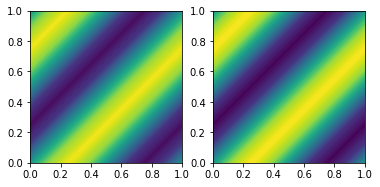

In [ ]:
u_e=Expression("1+sin(2*pi*(x[0]-x[1]))", degree=2)
f1=interpolate(u_e,V)
plot(f1)
plt.subplot(1,2,1)
plot(u)
plt.subplot(1,2,2)
plot(f1)

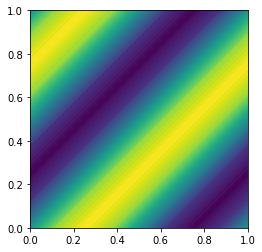

In [ ]:
f=interpolate(u_D,V)
plot(f)

In [ ]:
import numpy as np
error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

# Print errors
print('error_L2  =', error_L2)
print('error_max =', error_max)

error_L2  = 0.0020237000629114714
error_max = 0.0006568228397534348


In [ ]:
V_1=FunctionSpace(mesh1,'P',1) #1-linear elements

bc1 = DirichletBC(V_1, u_D, boundary)

In [ ]:
# Define variational problem
u_1 = TrialFunction(V_1)

v_1 = TestFunction(V_1)

f = f = Expression('2*pow(2*pi,2)*sin(2*pi*(x[0]-x[1]))',degree=2)
a_1 = dot(grad(u_1), grad(v_1))*dx

L_1 = f*v_1*dx

Calling FFC just-in-time (JIT) compiler, this may take some time.
0:00:00.530854


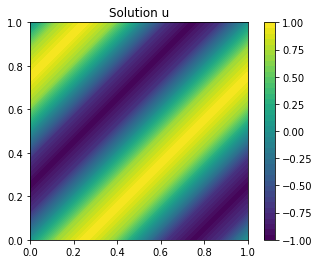

In [ ]:
from datetime import datetime


# Compute solution
u_1= Function(V_1)

startTime = datetime.now()
solve(a_1 == L_1, u_1, bc1)

endTime = datetime.now()

# Plot solution and mesh
p_1=plot(u_1,  title="Solution u")

plt.colorbar(p_1)

#plot(mesh)
print(endTime-startTime)  #plot for linear elements.

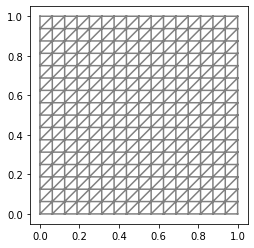

In [ ]:
plot(mesh2)

In [122]:
V_2=FunctionSpace(mesh2,'P',3) #3-cubic elements
bc2 = DirichletBC(V_2, u_D, boundary)

Calling FFC just-in-time (JIT) compiler, this may take some time.


In [124]:
# Define variational problem
u_2 = TrialFunction(V_2)

v_2 = TestFunction(V_2)
f = Expression('2*pow(2*pi,2)*sin(2*pi*(x[0]-x[1]))',degree=2)
a_2 = dot(grad(u_2), grad(v_2))*dx

L_2 = f*v_2*dx

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
0:00:01.113844


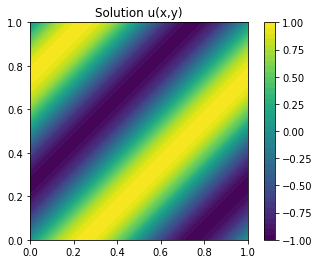

In [125]:
from datetime import datetime


# Compute solution
u_2= Function(V_2)

startTime = datetime.now()
solve(a_2 == L_2, u_2, bc2)

endTime = datetime.now()

# Plot solution and mesh
p_2=plot(u_2,  title="Solution u(x,y)")

plt.colorbar(p_2)

#plot(mesh)
print(endTime-startTime)  #plot for cubic elements with 16 by 16 mesh.

In [126]:
n=FacetNormal(mesh1)
flux=-dot(grad(u),n)*ds  #flux functional
totalflux=assemble(flux)
print('totalflux =', totalflux)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
totalflux = 1.1102230246251565e-15


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


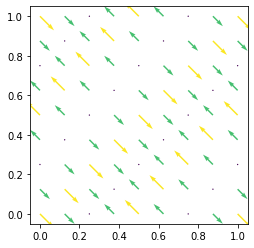

In [127]:
plot(grad(u)) #plot of gradient of u(x,y)